In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Обработка выбросов**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/pokemon.csv')

df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


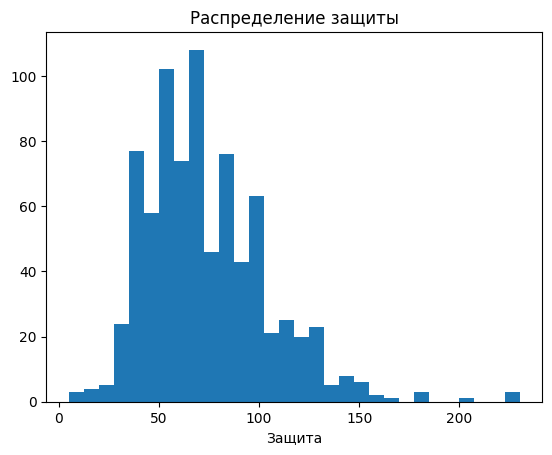

In [ ]:
plt.title('Распределение защиты')
plt.xlabel('Защита')
plt.hist(df['defense'],bins = 30);

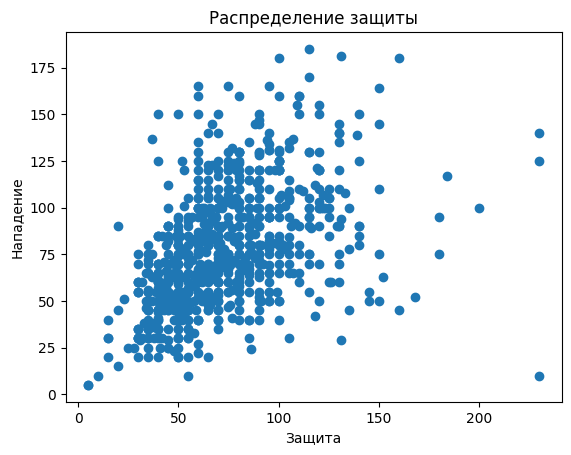

In [ ]:
plt.title('Распределение защиты')
plt.xlabel('Защита')
plt.ylabel('Нападение')
plt.scatter(df['defense'],df['attack']);

Правило трех сигм

In [ ]:
df['defense_z'] = (df['defense'] - df['defense'].mean()) / df['defense'].std()

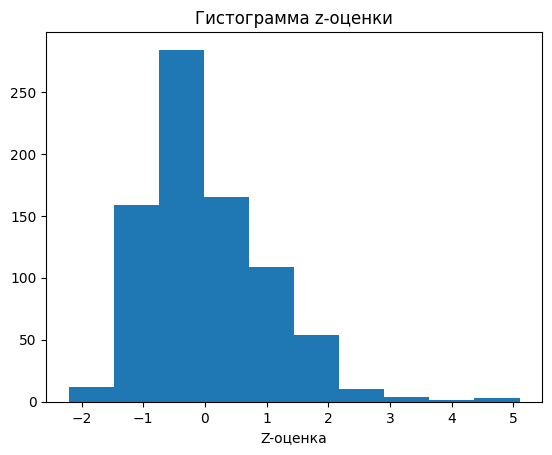

In [ ]:
plt.title('Гистограмма z-оценки')
plt.xlabel('Z-оценка')
plt.hist(df['defense_z']);

In [ ]:
df[df['defense_z']>3]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,defense_z
79,"['Oblivious', 'Own Tempo', 'Regenerator']",2.0,2.0,1.0,2.0,1.0,0.5,0.5,1.00,2.0,...,80,130,80,30,water,psychic,78.5,1,0,3.477224
90,"['Shell Armor', 'Skill Link', 'Overcoat']",1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.00,1.0,...,91,85,45,70,water,ice,132.5,1,0,3.477224
207,"['Rock Head', 'Sturdy', 'Sheer Force']",0.5,1.0,0.5,0.0,0.5,2.0,2.0,0.50,1.0,...,208,55,95,30,steel,ground,400.0,2,0,5.102228
212,"['Sturdy', 'Gluttony', 'Contrary']",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,...,213,10,230,5,bug,rock,20.5,2,0,5.102228
305,"['Sturdy', 'Rock Head', 'Heavy Metal']",0.5,1.0,0.5,1.0,0.5,4.0,1.0,0.25,1.0,...,306,60,80,50,steel,rock,360.0,3,0,5.102228
376,"['Clear Body', 'Sturdy']",1.0,1.0,1.0,1.0,1.0,2.0,0.5,0.50,1.0,...,377,50,100,50,rock,NaN,230.0,3,1,4.127226
410,"['Sturdy', 'Soundproof']",0.5,1.0,0.5,1.0,0.5,4.0,1.0,0.25,1.0,...,411,47,138,30,rock,steel,149.5,4,0,3.087223
712,"['Own Tempo', 'Ice Body', 'Sturdy']",1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.00,1.0,...,713,44,46,28,ice,NaN,505.0,6,0,3.607224


In [ ]:
df_new = df[df['defense_z']>3]
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,defense_z
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,1,65,65,45,grass,poison,6.9,1,0,-0.780286
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,2,80,80,60,grass,poison,13.0,1,0,-0.325285
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,3,122,120,80,grass,poison,100.0,1,0,1.624720
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,4,60,50,65,fire,NaN,8.5,1,0,-0.975286
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,5,80,65,80,fire,NaN,19.0,1,0,-0.487785


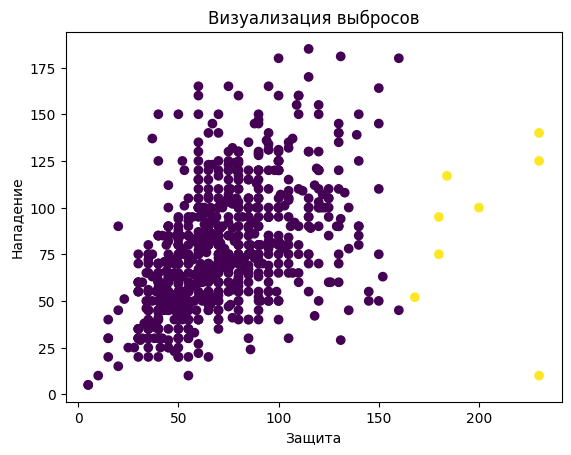

In [ ]:
plt.title('Визуализация выбросов')
plt.xlabel('Защита')
plt.ylabel('Нападение')
plt.scatter(df['defense'],df['attack'], c = df['defense_z']>3);

2. Поиск выбросов на основе межквартильного расстояния

In [10]:
defense = df['defense']

In [11]:
defense_arr = np.array(defense)

In [12]:
defense.describe()

,defense
count,801.000000
mean,73.008739
std,30.769159
min,5.000000
25%,50.000000
50%,70.000000
75%,90.000000
max,230.000000


In [13]:
print(f'Нижний квантиль: {np.quantile(defense,0.25)}')
print(f'Медиана: {np.quantile(defense,0.5)}')
print(f'Верхний квантиль: {np.quantile(defense,0.75)}')

Нижний квантиль: 50.0
Медиана: 70.0
Верхний квантиль: 90.0


Расчитываем расстояния между квантилями

In [16]:
# Определяем границы
lq = np.quantile(defense_arr,0.25)
uq = np.quantile(defense_arr,0.75)

In [18]:
iqr = uq -lq

In [20]:
iqr

40.0

In [21]:
#Получаем границы
lower_bound = lq - 1.5*iqr
lower_bound

-10.0

In [22]:
upper_bound = uq+1.5*iqr
upper_bound

150.0

In [26]:
col = df[(df['defense'] <= lower_bound) | (df['defense'] >= upper_bound)]

In [27]:
col.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,defense_z
79,"['Oblivious', 'Own Tempo', 'Regenerator']",2.0,2.0,1.0,2.0,1.0,0.5,0.5,1.0,2.0,...,80,130,80,30,water,psychic,78.5,1,0,3.477224
90,"['Shell Armor', 'Skill Link', 'Overcoat']",1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,...,91,85,45,70,water,ice,132.5,1,0,3.477224
94,"['Rock Head', 'Sturdy', 'Weak Armor']",1.0,1.0,1.0,0.0,1.0,2.0,0.5,0.5,1.0,...,95,30,45,70,rock,ground,210.0,1,0,2.827223
207,"['Rock Head', 'Sturdy', 'Sheer Force']",0.5,1.0,0.5,0.0,0.5,2.0,2.0,0.5,1.0,...,208,55,95,30,steel,ground,400.0,2,0,5.102228
212,"['Sturdy', 'Gluttony', 'Contrary']",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,213,10,230,5,bug,rock,20.5,2,0,5.102228


In [28]:
col.shape[1]

42

In [30]:
col_mask = (df['defense'] <= lower_bound) | (df['defense'] >= upper_bound)

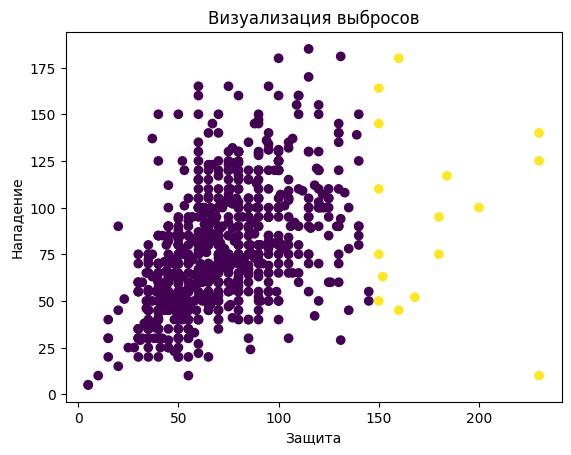

In [32]:
plt.title('Визуализация выбросов')
plt.xlabel('Защита')
plt.ylabel('Нападение')
plt.scatter(df['defense'],df['attack'], c = col_mask);

In [33]:
# Выбросы по второй колонке
attack_lq = df['attack'].quantile(0.25)
attack_uq = df['attack'].quantile(0.75)
attack_iqr = attack_uq-attack_lq
attack_lb = attack_lq-1.5*attack_iqr
attack_ub = attack_uq+1.5*attack_iqr

In [34]:
col_attack = (df['attack'] <= lower_bound) | (df['attack'] >= upper_bound)

In [35]:
sum(df['attack'] <= lower_bound)

0

In [36]:
sum(df['attack'] >= upper_bound)

24

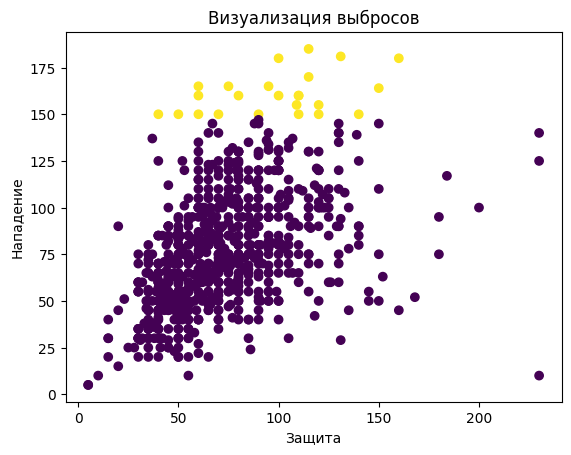

In [37]:
plt.title('Визуализация выбросов')
plt.xlabel('Защита')
plt.ylabel('Нападение')
plt.scatter(df['defense'],df['attack'], c = col_attack);

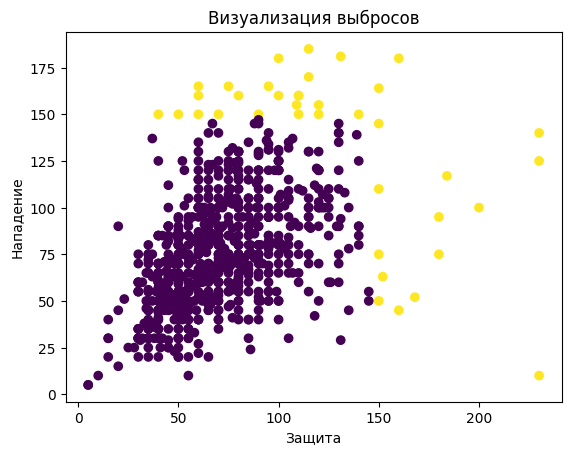

In [38]:
plt.title('Визуализация выбросов')
plt.xlabel('Защита')
plt.ylabel('Нападение')
plt.scatter(df['defense'],df['attack'], c = np.array(col_mask) + np.array(col_attack));

**Поиск выбросов средствами SKlearn**

In [39]:
from sklearn.ensemble import IsolationForest

In [40]:
isf = IsolationForest(n_estimators=100, random_state= 17)

In [41]:
preds = isf.fit_predict(df[['attack', 'defense']])

In [42]:
isf.decision_function(df[['attack', 'defense']])

array([ 8.12125475e-02,  8.83364943e-02,  2.98385437e-02,  7.17778133e-02,
        8.58993205e-02,  6.97849570e-02,  7.39576895e-02,  7.48798028e-02,
        2.48334409e-02,  3.17761019e-02, -6.37957027e-02,  8.12454804e-02,
        1.53272983e-02, -1.58090325e-02, -1.36325741e-01,  7.58682780e-02,
        9.62818511e-02,  8.35731800e-02,  5.29108070e-02,  1.02567787e-01,
        2.42957289e-02,  9.19200935e-02,  7.93869941e-02,  8.16408553e-02,
        7.02627959e-02,  7.11104338e-02,  7.84603106e-02,  3.40354807e-02,
        7.35522052e-02,  8.81078940e-02,  5.67958543e-02,  6.73170943e-02,
        8.28266482e-02,  6.46520940e-02,  7.78757619e-02,  9.78855619e-02,
        6.26857642e-02,  9.65714375e-02, -5.96953971e-02,  7.61015420e-02,
        6.03979168e-02,  9.90734569e-02,  8.90295075e-02,  1.03923117e-01,
        7.55406830e-02,  9.89815078e-02,  7.68134565e-02,  8.93570546e-02,
        9.63530005e-02,  2.25131952e-02,  6.36057833e-02,  4.19875017e-02,
        9.76983388e-02,  

In [43]:
df['scores'] = isf.decision_function(df[['attack', 'defense']])

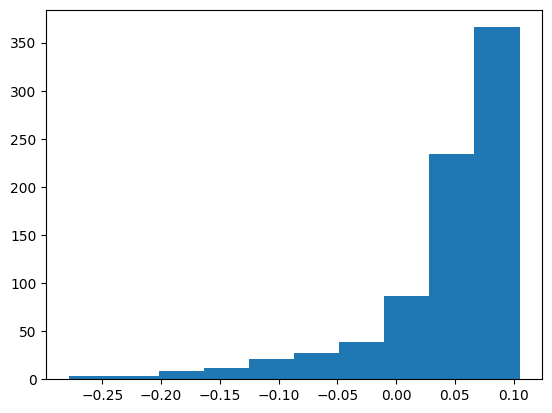

In [44]:
plt.hist(df['scores']);

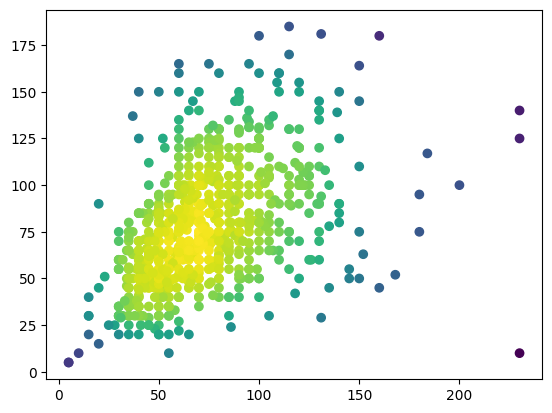

In [45]:
plt.scatter(df['defense'], df['attack'],c = df['scores']);